In [259]:
import numpy as np 
import pickle
import os
import argparse
import shutil
import torch
import numpy as np
import pandas as pd

from collections import Counter
from copy import deepcopy
from utils.data_utils import get_datasets
from utils.visualizaitons import *
from utils.helper_functions import *
from utils import set_seeds
from log_tools import logger, save_results
from configs import load_configs
from models import OpenSetModel, train_autoencoder, identify_new_sources
from models.autoencoder import DummyAutoencoder

In [260]:
config_path = 'configs/config.yaml'
configs = load_configs(config_path)
datasets = get_datasets(configs["data"])

KeyboardInterrupt: 

In [ ]:
pkl_file_name = "good_logs/02-28_18:38-best-results-without-mjv5/states/11_sdxl/state.pkl"
# pkl_file_name = "logs/03-06_11:10/states/0_initial/state.pkl"
with open(pkl_file_name, 'rb') as f:
    contents = pickle.load(f)
print(contents.keys())

dict_keys(['open_set', 'ae', 'results'])


In [ ]:
open_set_model: OpenSetModel = contents['open_set']
current_ae = contents['ae']
emerging_label = 4

In [ ]:
y_emerging_test = datasets["emerging"]["test"][1]
eval_datasets_X = np.concatenate(
    (
        datasets["init_known"]["test"][0],
        # datasets["emerging"]["test"][0][y_emerging_test <= emerging_label],
    )
)
eval_datasets_y = np.concatenate(
    (
        datasets["init_known"]["test"][1],
        # y_emerging_test[y_emerging_test <= emerging_label],
    )
)

eval_results = open_set_model.evaluate(
    current_ae.embed(eval_datasets_X),
    eval_datasets_y,
)
for key, value in eval_results.items():
    print(f"{key}: {value}")
    if key == "confusion_matrix":
        continue

confusion_matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2 956   4   0   0   0   0   0   1   0   9   1  27]
 [  0   0   0   0 962  10   1   0   0   0   0  27   0]
 [  0   0  78 812  11   0   0   6   0  46   5  42   0]
 [  0   2 842   3   1   0   0   0   6  39   0 107   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]]
balanced_accuracy: 0.4422
balanced_accuracy_current: 0.001
detection_accuracy: 0.9787
detection_accuracy_current: 0.998


/home/aref/projects/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aref/projects/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/home/aref/projects/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [300]:
pkl_file_path = "good_logs/02-28_18:38-best-results-without-mjv5/states/11_sdxl/state.pkl"
# pkl_file_path = "good_logs/02-28_18:38-best-results-without-mjv5/states/10_sd3/state.pkl"
# pkl_file_path = "good_logs/02-28_18:38-best-results-without-mjv5/states/4_progan/state.pkl"
with open(pkl_file_path, 'rb') as f:
    contents = pickle.load(f)
open_set_model: OpenSetModel = contents['open_set']
current_ae = contents['ae']
emerging_label = 4

In [301]:
from sklearn.metrics import roc_auc_score, average_precision_score, balanced_accuracy_score



In [304]:
config_path = 'configs/config.yaml'
configs = load_configs(config_path)
datasets = get_datasets(configs["data"])

y_init = datasets["init_known"]["test"][1]
new_det_X = np.concatenate(
    (
        # datasets["init_known"]["test"][0][y_init == 0][datasets["init_known"]["test"][1][y_init == 0] == 0],
        datasets["init_known"]["test"][0][y_init == 0],
        datasets["init_known"]["test"][0][y_init != 0],
        datasets["emerging"]["test"][0],
    )
)
# new_det_X = 
new_det_y = np.concatenate(
    (
        np.ones(datasets["init_known"]["test"][0][y_init == 0].shape[0],),
        np.zeros(datasets["init_known"]["test"][0][y_init != 0].shape[0],),
        np.zeros(datasets["emerging"]["test"][0].shape[0],)
    )
)

# det_y = np.concatenate(
#         (
#             datasets["init_known"]["test"][1][y_init == 0],
#             datasets["init_known"]["test"][1][y_init != 0],
#         )
# )

src_preds = open_set_model.classify(current_ae.embed(new_det_X))
det_preds = (src_preds == 0).astype(int)

det_acc = balanced_accuracy_score(new_det_y, det_preds)
print(f"Det acc: {det_acc}")

scores_detection = open_set_model.gmm_dict[0].score_samples(
    current_ae.embed(new_det_X)
)
# preds_detection = -preds_detection
auc = roc_auc_score(new_det_y, scores_detection)
ap = average_precision_score(new_det_y, scores_detection)
print(f"AUC: {auc}")
# print(f"AP: {ap}")

Det acc: 0.9775151515151514
AUC: 0.9835984242424242


In [303]:
raise ValueError

ValueError: 

In [ ]:
np.mean([92.4, 83.6, 94.0, 67.6, 49.6, 90.8, 79.2, 82.0])

79.9

In [ ]:
src_acc_X = np.concatenate(
    (
        # datasets["init_known"]["test"][0][y_init == 0][datasets["init_known"]["test"][1][y_init == 0] == 0],
        datasets["init_known"]["test"][0],
        # datasets["init_known"]["test"][0][y_init != 0],
        datasets["emerging"]["test"][0][datasets["emerging"]["test"][1] <=  emerging_label],
    )
)
src_acc_y = np.concatenate(
    (
        datasets["init_known"]["test"][1],
        datasets["emerging"]["test"][1][datasets["emerging"]["test"][1] <=  emerging_label],
    )
)
src_preds = open_set_model.classify(current_ae.embed(src_acc_X))
src_acc = balanced_accuracy_score(src_acc_y, src_preds)
print(f"Src acc: {src_acc}")

Src acc: 0.3538


/home/aref/projects/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [ ]:
att_dataset = datasets["init_known"]["test"][0]
att_labels = datasets["init_known"]["test"][1]

src_preds = open_set_model.classify(current_ae.embed(att_dataset))
att_acc = balanced_accuracy_score(att_labels, src_preds)
print(f"Att acc: {att_acc}")

Att acc: 0.44225


/home/aref/projects/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [ ]:
def relative_error_reduction_accuracy(acc_old, acc_new):
    if not (0 <= acc_old < 1):
        raise ValueError("acc_old must be in the range [0, 1), where 1 means 100% accuracy (zero error).")
    if not (0 <= acc_new <= 1):
        raise ValueError("acc_new must be in the range [0, 1].")
    error_old = 1 - acc_old
    error_new = 1 - acc_new
    reduction = (error_old - error_new) / error_old * 100
    return reduction

# Example usage:
baseline_accuracy = 92.4 / 100  # 80%
new_accuracy = 98.1 / 100       # 85%
print("Relative Error Reduction: {:.2f}%".format(relative_error_reduction_accuracy(baseline_accuracy, new_accuracy)))


Relative Error Reduction: 75.00%


In [ ]:
np.unique(src_preds, return_counts=True), np.unique(att_labels, return_counts=True)

((array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
  array([  2, 958, 924, 815, 974,  10,   1,   6,   7,  85,  14, 177,  27])),
 (array([0, 1, 2, 3]), array([1000, 1000, 1000, 1000])))

In [ ]:
new_det_y, det_preds

(array([1., 1., 1., ..., 0., 0., 0.]), array([0, 0, 1, ..., 0, 0, 0]))

In [ ]:
np.zeros_like(y_emerging_test[y_emerging_test == emerging_label]).shape

(750,)

In [ ]:
import numpy as np


def cumulative_average(numbers, initial):
    numbers = np.array(numbers)  # ensure it's a numpy array
    cumsum = np.cumsum(numbers)
    indices = np.arange(1, len(numbers) + 1)
    cumavg = cumsum / indices
    return np.concatenate(([initial], cumavg))
open_set_model: OpenSetModel = contents['open_set']
current_ae = contents['ae']
emerging_label = 11



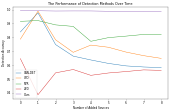

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

cnn_det = cumulative_average([0.9770	,0.5190,	0.4980,	0.5540,	0.5120,	0.5050,	0.5390,	0.5510], 0.8387)

ufd = cumulative_average([0.9890	,0.5760	,0.5110	,0.9010	,0.6660	,0.5200	,0.5130	,0.5110], 0.7867)

npr = cumulative_average([0.9210,	0.8590,	0.8570,	0.4490,	0.9040,	0.8640	,0.8930,	0.8180], 0.9157)

zed = cumulative_average([0.3860,	0.7020,	0.6160,	0.4000,	0.6110,	0.6050,	0.6370,	0.5380], 0.6467)

ours = cumulative_average([0.9920,	0.9880,	0.9920,	0.9900,	0.9790,	0.9890	,0.9870	,0.9800], 0.9920)

plt.figure(figsize=(10, 6), dpi=20)
plt.plot(cnn_det, label="CNN-DET")
plt.plot(ufd, label="UFD")
plt.plot(npr, label="NPR")
plt.plot(zed, label="ZED")
plt.plot(ours, label="Ours")
plt.title("The Performance of Detection Methods Over Time")
plt.xlabel("Number of Added Sources")
plt.ylabel("Detection Accuracy")
plt.legend()
plt.show()

In [ ]:
def randomized_cumulative_average(numbers, initial_n=3):

    numbers = np.array(numbers)
    initial_value = numbers[0]
    perm = np.random.permutation(len(numbers))
    shuffled = numbers[perm]
    n = initial_n
    q_list = [initial_value]
    for i in range(1, len(numbers)):
        n += 1
        q = (q_list[i - 1] * (n - 1) + shuffled[i]) / n
        q_list.append(q)
    # q_list = np.concatenate(([initial_value], q_list))
    return q_list

def repeated_randomized_cumavg(numbers, initial_value, num_iters=10):
    numbers = np.array(numbers)
    L = len(numbers)
    # Store cumulative averages for each repetition in a 2D array of shape (N, L)
    results = np.zeros((num_iters, L))
    
    for i in range(num_iters):
        results[i, :] = randomized_cumulative_average(numbers)
    
    # Compute the mean and standard deviation along the repetitions (axis 0)
    mean_cum_avg = results.mean(axis=0)
    std_cum_avg = results.std(axis=0)
    return mean_cum_avg, std_cum_avg

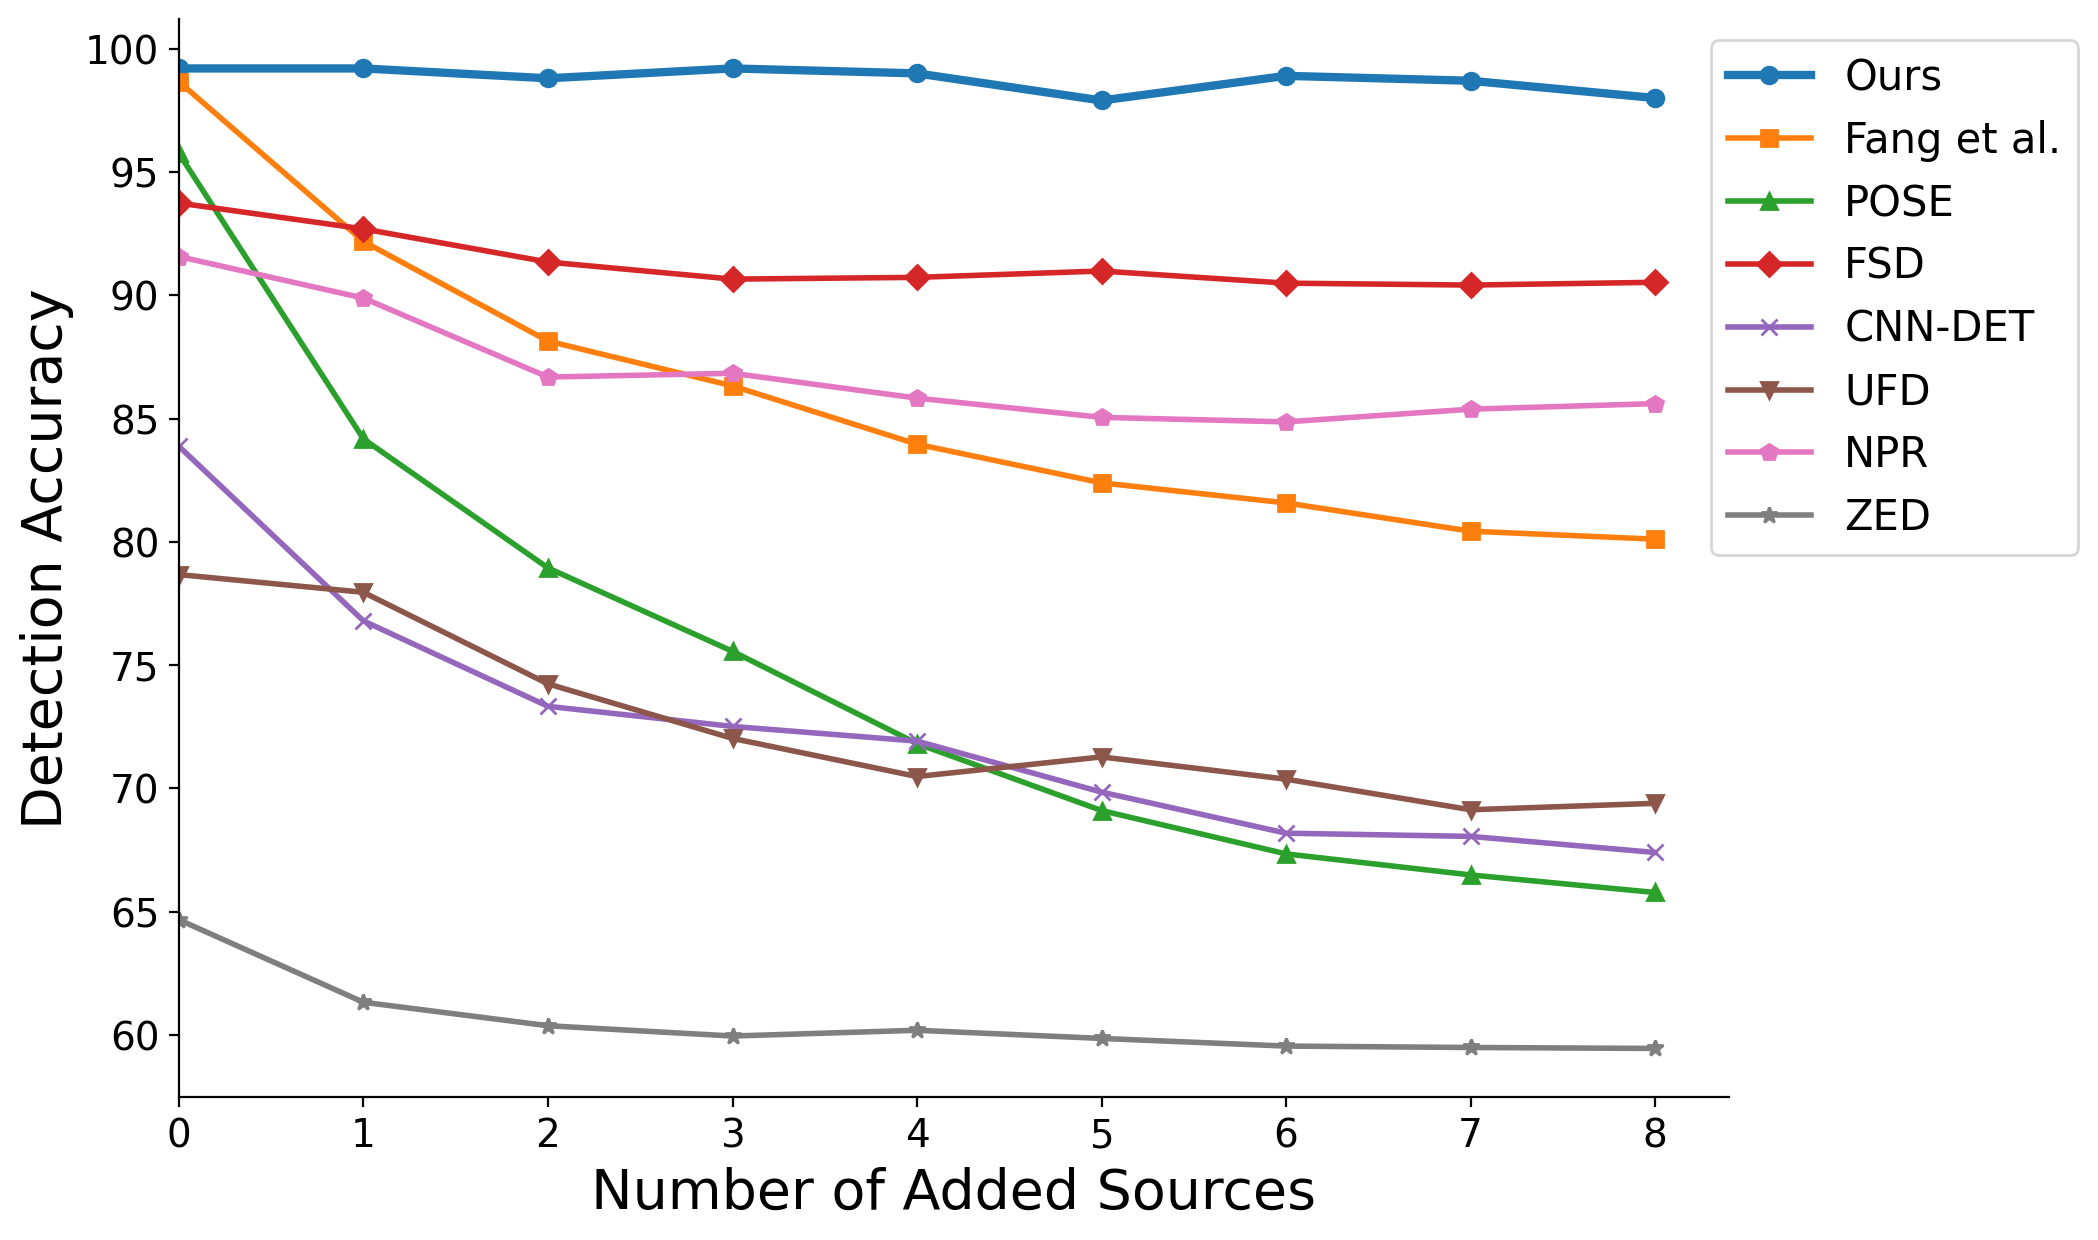

In [ ]:
cnn_det_org = np.array([0.8387, 0.9770	,0.5190,	0.4980,	0.5540,	0.5120,	0.5050,	0.5390,	0.5510]) * 100
ufd_org = np.array([0.7867, 0.9890	,0.5760	,0.5110	,0.9010	,0.6660	,0.5200	,0.5130	,0.5110]) * 100
npr_org = np.array([0.9157, 0.9210,	0.8590,	0.8570,	0.4490,	0.9040,	0.8640	,0.8930,	0.8180]) * 100
zed_org = np.array([0.6467, 0.3860,	0.7020,	0.6160,	0.4000,	0.6110,	0.6050,	0.6370,	0.5380]) * 100
ours_org = np.array([0.9920, 0.9920,	0.9880,	0.9920,	0.9900,	0.9790,	0.9890	,0.9870	,0.9800]) * 100
fsd_org = np.array([0.9374	,0.9640	,0.9640	,0.9407	,0.9253	,0.9353	,0.6880	,0.9640	,0.6653	]) * 100
fang_org = np.array([98.66, 86,57,54,84,74.5,60.5,70.5,67.5])
pose_org_det = np.array([95.75, 47.3,48.9,49.7,48.69,52.3,51.1,47.9,48.9])
chance_det = np.array([50] * 9)

num_iters = 100
cnn_det_mean, cnn_det_std = repeated_randomized_cumavg(cnn_det_org, num_iters)
ufd_mean, ufd_std = repeated_randomized_cumavg(ufd_org, num_iters)
npr_mean, npr_std = repeated_randomized_cumavg(npr_org, num_iters)
zed_mean, zed_std = repeated_randomized_cumavg(zed_org, num_iters)
pose_mean, pose_std = repeated_randomized_cumavg(pose_org_det, num_iters)
fsd_mean, fsd_std = repeated_randomized_cumavg(fsd_org, num_iters)
ours_mean, ours_std = repeated_randomized_cumavg(ours_org, num_iters)
fang_mean, fang_std = repeated_randomized_cumavg(fang_org, num_iters)

plt.figure(figsize=(10, 7), dpi=200)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make sure ticks are only on bottom and left
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


ax.spines['left'].set_position(('axes', 0))
ax.spines['bottom'].set_position(('axes', 0))

plt.plot(ours_org, label="Ours", marker='o', linewidth=3)
plt.plot(fang_mean, label="Fang et al.", marker='s', linewidth=2)
plt.plot(pose_mean, label="POSE", marker='^', linewidth=2)
plt.plot(fsd_mean, label="FSD", marker='D', linewidth=2)
plt.plot(cnn_det_mean, label="CNN-DET", marker='x', linewidth=2)
# plt.fill_between(np.arange(len(pose_mean)), pose_mean - pose_std, pose_mean + pose_std, alpha=0.1)
# plt.fill_between(np.arange(len(cnn_det_mean)), cnn_det_mean - cnn_det_std, cnn_det_mean + cnn_det_std, alpha=0.1)
plt.plot(ufd_mean, label="UFD", marker='v', linewidth=2)
# plt.fill_between(np.arange(len(ufd_mean)), ufd_mean - ufd_std, ufd_mean + ufd_std, alpha=0.1)
plt.plot(npr_mean, label="NPR", marker='p', linewidth=2)
# plt.fill_between(np.arange(len(npr_mean)), npr_mean - npr_std, npr_mean + npr_std, alpha=0.1)
plt.plot(zed_mean, label="ZED", marker='*', linewidth=2)
# plt.fill_between(np.arange(len(zed_mean)), zed_mean - zed_std, zed_mean + zed_std, alpha=0.1)
# plt.fill_between(np.arange(len(fsd_mean)), fsd_mean - fsd_std, fsd_mean + fsd_std, alpha=0.1)
# plt.plot(ours_mean, label="Ours", linewidth=3)
# plt.fill_between(np.arange(len(ours_mean)), ours_mean - ours_std, ours_mean + ours_std, alpha=0.1)

# plt.title("The Performance of Detection Methods Over Time", fontsize=18)
plt.xlabel("Number of Added Sources", fontsize=20)
plt.ylabel("Detection Accuracy", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(0.975, 1), fontsize=15)
# Force x-axis to start at 0 and remove margins
plt.xlim(left=0)
plt.margins(x=0)
# plt.grid()
# plt.tight_layout()
plt.show()


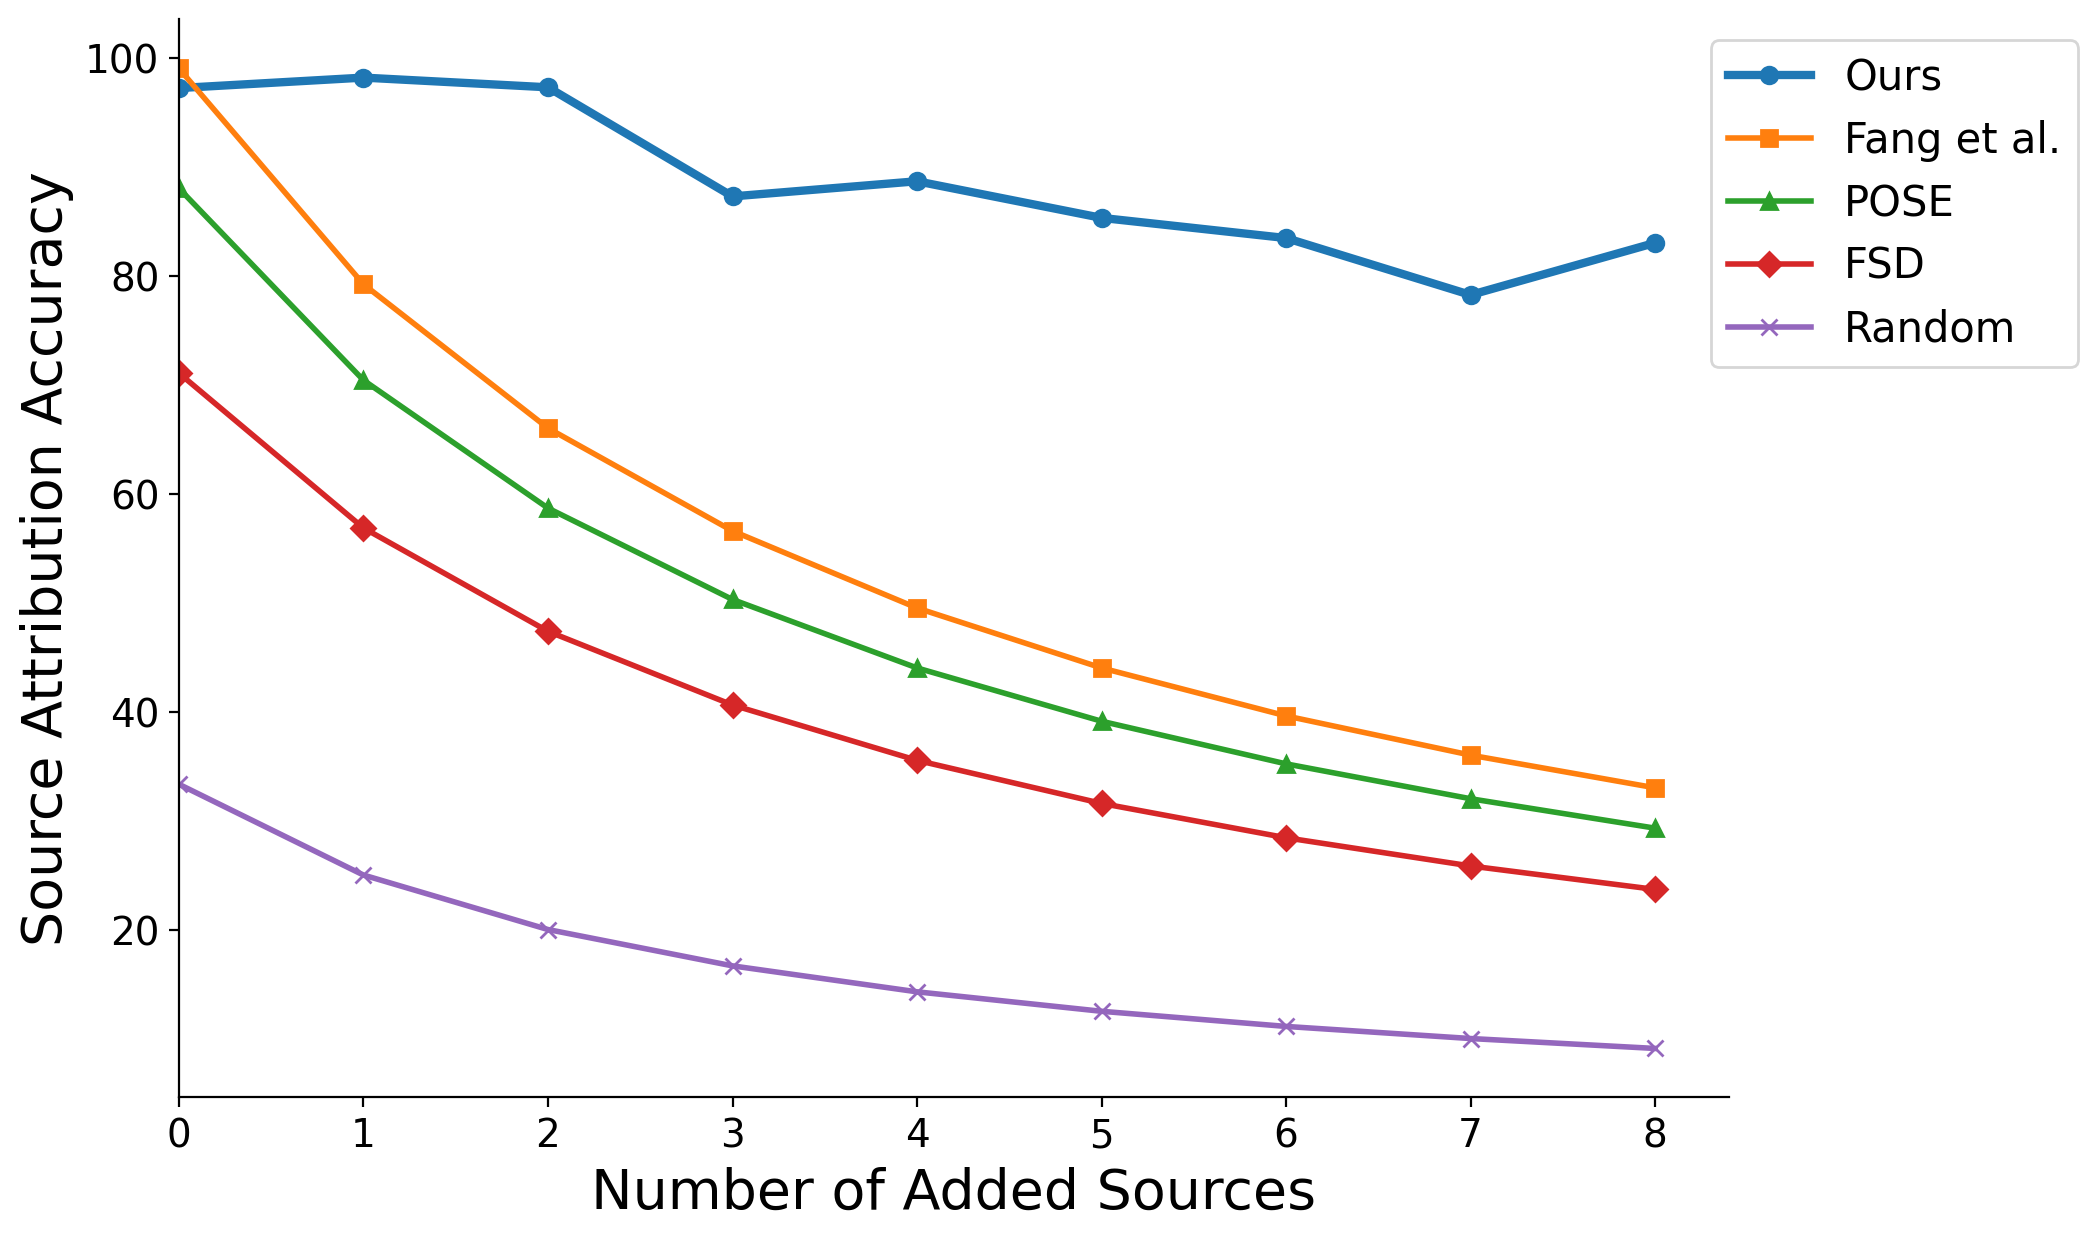

In [ ]:
pose_accs = np.array([88.        , 70.4       , 58.66       , 50.28, 44     ,
       39.11, 35.2       , 32, 29.3      ])
ours_accs = np.array([0.9720, 0.9816, 0.9727, 0.8726, 0.8865, 0.8529, 0.8344, 0.7822, 0.83]) * 100
# fsd_accs = np.array([51.54, 41.23, 34.36, 29.45, 25.77, 22.91, 20.62, 18.74, 17.18])
fsd_accs = np.array([71.05, 56.84, 47.36, 40.6, 35.52, 31.57, 28.42, 25.83, 23.68])
fang_accs = np.array([99, 79.2, 66, 56.57, 49.5, 44, 39.6, 36, 33])
chance = [33.33]
chance.extend([1 / i * 100 for i in range(4, 12)])


plt.figure(figsize=(10, 7), dpi=200)

ax = plt.gca()
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Make sure ticks are only on bottom and left
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', 0))
ax.spines['bottom'].set_position(('axes', 0))

# Plot with unique markers
plt.plot(ours_accs, label="Ours", marker='o', linestyle='-', linewidth=3)
plt.plot(fang_accs, label="Fang et al.", marker='s', linestyle='-', linewidth=2)
plt.plot(pose_accs, label="POSE", marker='^', linestyle='-', linewidth=2)
plt.plot(fsd_accs, label="FSD", marker='D', linestyle='-', linewidth=2)
plt.plot(chance, label="Random", marker='x', linestyle='-', linewidth=2)

# plt.title("Source Attribution Accuracy Over Time", fontsize=18)
plt.xlabel("Number of Added Sources", fontsize=20)
plt.ylabel("Source Attribution Accuracy", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend(loc="right", fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(0.975, 1), fontsize=15)


plt.xlim(left=0)
plt.margins(x=0)
# plt.grid()
# plt.tight_layout()
plt.show()


In [ ]:
initial = 51.547
n = 3
